<a href="https://colab.research.google.com/github/sebabecerra/Descarga_Datos/blob/main/DescargaDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio de ejemplo para descarga de datos

In [ ]:
!pip install -q condacolab
!pip uninstall matplotlib -y
!pip install -q condacolab
!git clone https://github.com/zorzalerrante/aves.git aves_git
!mamba env update --name base --file aves_git/environment-colab.yml
!pip install nelson_siegel_svensson
import condacolab
condacolab.install_mambaforge()
!pip install matplotlib

In [ ]:
import numpy as np
import requests
import pandas as pd
from copy import deepcopy
import pandas._testing as tm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime
from google.colab import files
import matplotlib.pyplot as plt
#from aves.features.utils import normalize_rows
import matplotlib as mpl
import seaborn as sns
import statsmodels.api as sm
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve
import numpy as np
from matplotlib.pyplot import plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Datos
tasas= {'bcu1' : "F022.BUF.TIS.AN01.UF.Z.D",
        'bcu2' : "F022.BUF.TIS.AN02.UF.Z.D", 
        'bcu5' : "F022.BUF.TIS.AN05.UF.Z.D",
        'bcu10': "F022.BUF.TIS.AN10.UF.Z.D",
        'bcu20': "F022.BUF.TIS.AN20.UF.Z.D",
        'bcu30': "F022.BUF.TIS.AN30.UF.Z.D"}

In [ ]:
for key in tasas:
  print(key, ":", tasas[key])

bcu1 : F022.BUF.TIS.AN01.UF.Z.D
bcu2 : F022.BUF.TIS.AN02.UF.Z.D
bcu5 : F022.BUF.TIS.AN05.UF.Z.D
bcu10 : F022.BUF.TIS.AN10.UF.Z.D
bcu20 : F022.BUF.TIS.AN20.UF.Z.D
bcu30 : F022.BUF.TIS.AN30.UF.Z.D


In [ ]:
url0="https://si3.bcentral.cl/SieteRestWS/SieteRestWS.ashx?user="
user="154100601"
pw="qnpMKgsTXeSM4Sj"
i="1996-01-01"
f="2022-12-31"
# TPM="F022.TPM.TIN.D001.NO.Z.D"
# dolar="F073.TCO.PRE.Z.D"
# bcu1 = "F022.BUF.TIS.AN01.UF.Z.D"
# bcu2 = "F022.BUF.TIS.AN02.UF.Z.D"
# bcu5 = "F022.BUF.TIS.AN05.UF.Z.D"
# bcu10 = "F022.BUF.TIS.AN10.UF.Z.D"
# bcu20 = "F022.BUF.TIS.AN20.UF.Z.D"
# bcu30 = "F022.BUF.TIS.AN30.UF.Z.D"
# bcp2="F022.BCLP.TIS.AN02.NO.Z.D"
# bcp5="F022.BCLP.TIS.AN05.NO.Z.D"
# bcp10="F022.BCLP.TIS.AN10.NO.Z.D"
# PIBNom="F032.PIB.FLU.R.CLP.EP03.Z.Z.1.T"

In [ ]:
data = []
for key in tasas:
  url = url0 + user + "&pass=" + pw + "&firstdate=" + i + "&lastdate=" + f + "&timeseries=" + tasas[key]+ "&function=GetSeries"
  response = requests.get(url)
  response = response.json()
  response = response["Series"]["Obs"]
  df_data = pd.DataFrame(response)
  df_data['tipo']=key
  data.append(df_data)

In [ ]:
df = pd.concat(data, axis=0, ignore_index=True)
df.columns=['Date', 'Valor', 'Codigo', 'Tipo']
df=df[['Date', 'Valor', 'Tipo']]
df['Valor'] = df['Valor'].apply(pd.to_numeric, errors='coerce')
df['Tipo'] = df['Tipo'].astype("string")
df = df[df['Valor'].notna()]
df['Valor'] = df['Valor'].round(3)
df['month'] = df['Date'].str[3:5]
df['year'] = df['Date'].str[6:10]
df['day'] = df['Date'].str[0:2]
df['Date']= pd.to_datetime(df[["year", "month", "day"]]).dt.strftime('%Y-%m-%d')
df['Date']=pd.to_datetime(df['Date'])
df=df.pivot(index=["Date","year", 'month', 'day'], columns="Tipo", values="Valor").reset_index()
df=df.sort_values(by=['Date'])
df.to_csv('bcus.csv') 

In [ ]:
sns.set_style('whitegrid')
# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
mpl.rcParams["figure.dpi"] = 150
# esto depende de las fuentes que tengas instaladas en el sistema.
mpl.rcParams["font.family"] = "Fira Sans Extra Condensed"

In [ ]:
def plot_nameseries(names):
    fig, ax = plt.subplots(figsize=(12, 4))
    names.plot(
        ax=ax,
        color=sns.color_palette("plasma", n_colors=len(names.columns)),
        linewidth=2,
    )
    fig.set_facecolor("#efefef")
    ax.set_facecolor("#efefef")
    sns.despine(ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("Porcentaje")
    fig.tight_layout()
    return fig, ax

In [ ]:
df
df=df.set_index('Date')

In [ ]:
df

Tipo,year,month,day,bcu1,bcu10,bcu2,bcu20,bcu30,bcu5
Date,,,,,,,,,
2002-09-10,2002,09,10,NaN,3.689,NaN,4.600,NaN,2.798
2002-09-11,2002,09,11,NaN,3.689,NaN,4.600,NaN,2.610
2002-09-12,2002,09,12,NaN,3.470,NaN,4.470,NaN,2.440
2002-09-13,2002,09,13,NaN,3.400,NaN,4.250,NaN,2.440
2002-09-16,2002,09,16,NaN,3.300,NaN,4.354,NaN,2.281
...,...,...,...,...,...,...,...,...,...
2022-07-18,2022,07,18,NaN,1.800,NaN,NaN,2.04,1.496
2022-07-19,2022,07,19,NaN,1.798,NaN,NaN,NaN,1.495
2022-07-20,2022,07,20,NaN,1.813,NaN,NaN,2.06,1.539


findfont: Font family ['Fira Sans Extra Condensed'] not found. Falling back to DejaVu Sans.


Text(0.0, 1.0, 'Tasas de Interes de los Bonos del BCCh')

findfont: Font family ['Fira Sans Extra Condensed'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Fira Sans Extra Condensed'] not found. Falling back to DejaVu Sans.


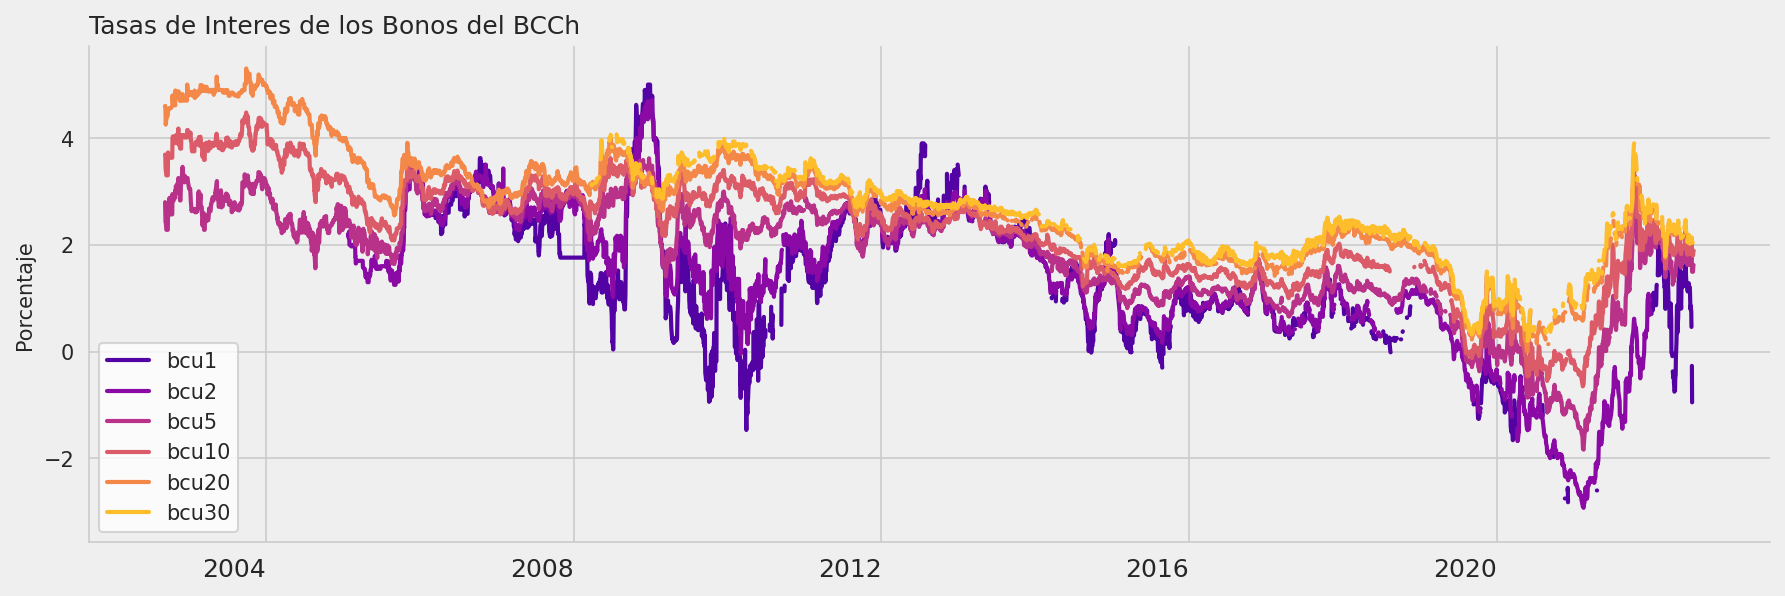

In [ ]:
#df=df.set_index('Date')
fig, ax = plot_nameseries(df[["bcu1", "bcu2", "bcu5", "bcu10", "bcu20", "bcu30"]])
ax.xaxis.set_tick_params(labelsize='large')
plt.xticks(rotation=0)
ax.legend()
ax.set_title("Tasas de Interes de los Bonos del BCCh", loc="left")

In [ ]:
df2=df[["bcu2", "bcu5", "bcu10"]].dropna()
df2=pd.DataFrame(df2)
bk_cycles = sm.tsa.filters.bkfilter(df2[["bcu2","bcu5", "bcu10"]], low=15, high=360*5, K=1*30)
bk_cycles

<AxesSubplot:xlabel='Date'>

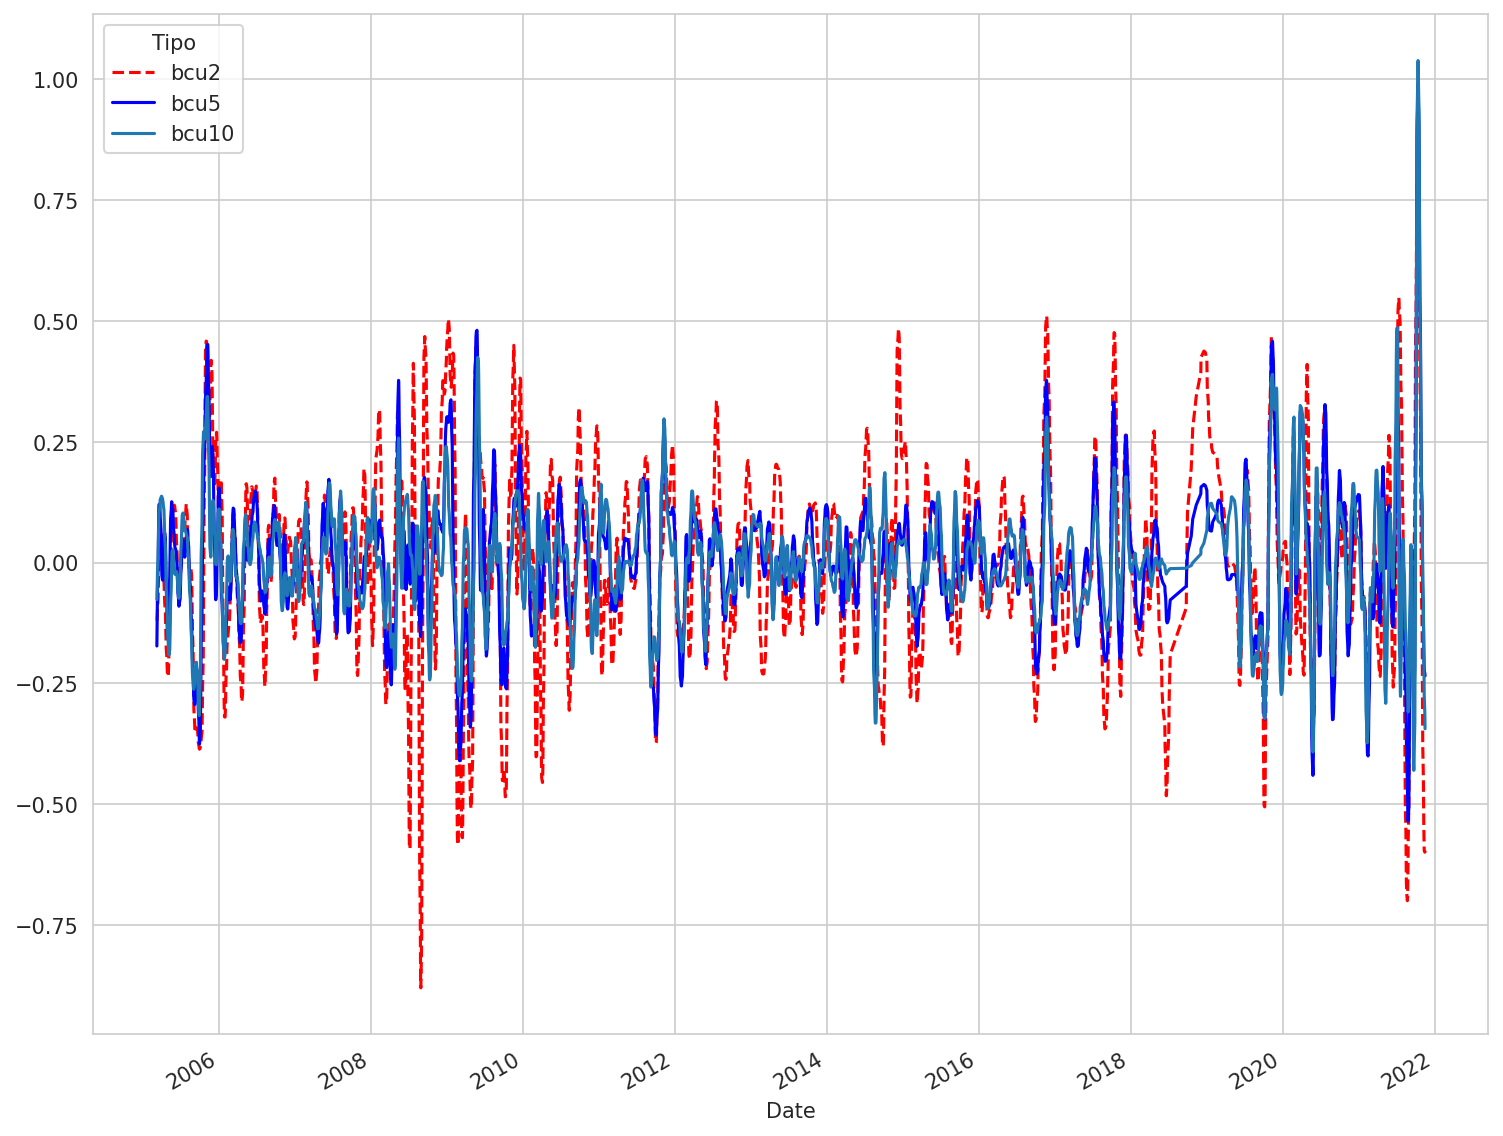

In [ ]:
df3 =  bk_cycles.reset_index()
df3_filtered =df3[df3["Date"] >= "2004-01-01"]
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
df3_filtered=df3_filtered.set_index("Date")
df3_filtered.plot(ax=ax, style=["r--", "b-"])

In [ ]:
merged = pd.merge(df2, bk_cycles, left_index=True, right_on='Date')


In [ ]:
merged

Tipo,bcu2_x,bcu5_x,bcu10_x,bcu2_y,bcu5_y,bcu10_y
Date,,,,,,
2005-03-08,1.690,2.028,2.750,-0.120353,-0.172590,-0.076332
2005-03-09,1.690,2.025,2.770,-0.117671,-0.139535,-0.061833
2005-03-10,1.700,2.025,2.750,-0.108631,-0.099409,-0.042601
2005-03-11,1.700,2.082,2.750,-0.094405,-0.053667,-0.018875
2005-03-14,1.700,2.201,2.800,-0.074323,-0.006419,0.007774
...,...,...,...,...,...,...
2021-11-10,-0.327,1.564,2.038,-0.545422,-0.184640,-0.186340
2021-11-11,-0.500,1.597,1.899,-0.575627,-0.207974,-0.233528
2021-11-12,-0.369,1.683,2.064,-0.595508,-0.221765,-0.275116


In [ ]:
merged['trendbcu5']=merged['bcu5_x']-100*merged['bcu5_y']
merged

Tipo,bcu2_x,bcu5_x,bcu10_x,bcu2_y,bcu5_y,bcu10_y,trendbcu5
Date,,,,,,,
2005-03-08,1.690,2.028,2.750,-0.120353,-0.172590,-0.076332,19.286984
2005-03-09,1.690,2.025,2.770,-0.117671,-0.139535,-0.061833,15.978471
2005-03-10,1.700,2.025,2.750,-0.108631,-0.099409,-0.042601,11.965905
2005-03-11,1.700,2.082,2.750,-0.094405,-0.053667,-0.018875,7.448658
2005-03-14,1.700,2.201,2.800,-0.074323,-0.006419,0.007774,2.842896
...,...,...,...,...,...,...,...
2021-11-10,-0.327,1.564,2.038,-0.545422,-0.184640,-0.186340,20.028015
2021-11-11,-0.500,1.597,1.899,-0.575627,-0.207974,-0.233528,22.394358
2021-11-12,-0.369,1.683,2.064,-0.595508,-0.221765,-0.275116,23.859483


Text(0.0, 1.0, 'Tasas de Interes de los Bonos del BCCh')

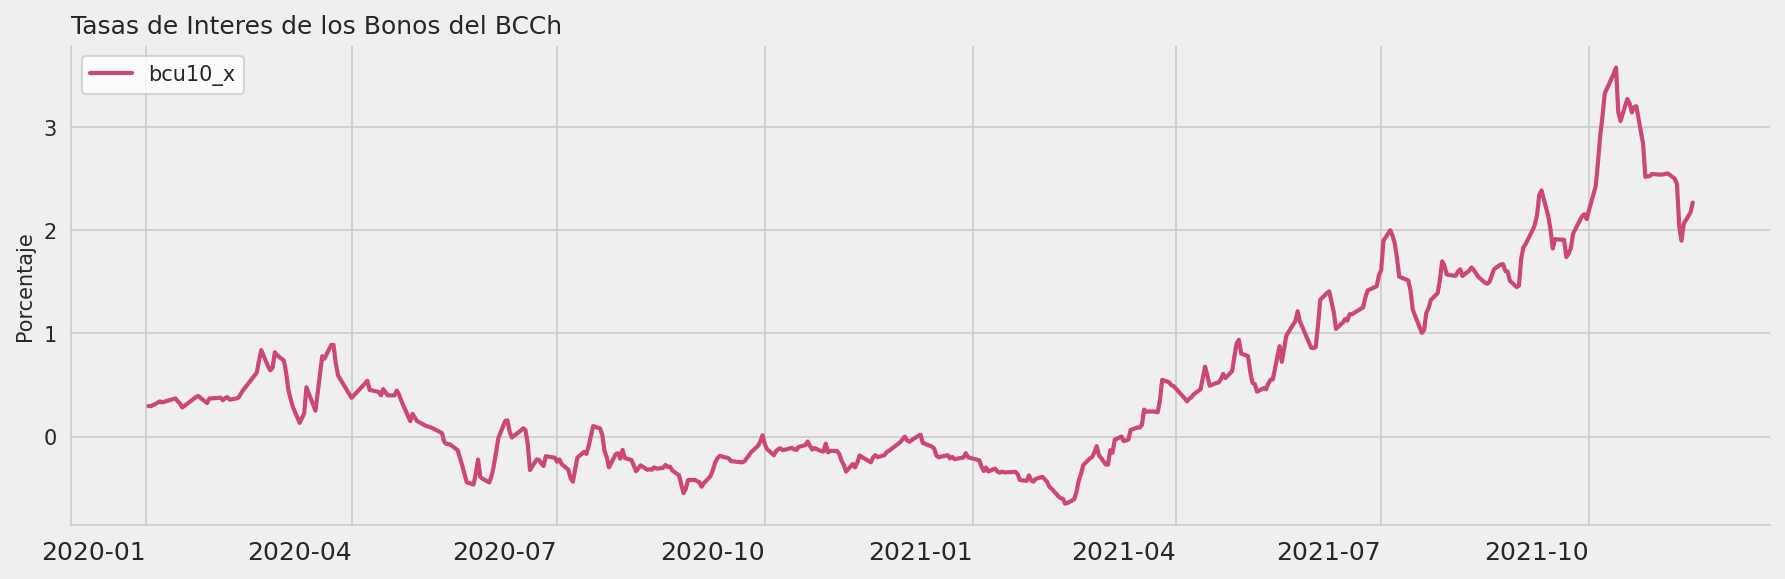

In [ ]:
df5=merged.reset_index()
df5['Ciclo']=df5["bcu10_y"]
df5_filtered =df5[df5["Date"] >= "2020-01-01"]
df5_filtered=df5_filtered.set_index("Date")
fig, ax = plot_nameseries(df5_filtered[["bcu10_x"]])
ax.xaxis.set_tick_params(labelsize='large')
plt.xticks(rotation=0)
ax.legend()
ax.set_title("Tasas de Interes de los Bonos del BCCh", loc="left")

In [ ]:
retiro=pd.read_csv('/content/drive/MyDrive/Retiro/RetiroSerie.csv')
retiro

,date,dia,mes,anio,retiro2_i
0,01jan2012,1,1,2012,0.000000
1,02jan2012,2,1,2012,0.002110
2,03jan2012,3,1,2012,0.001642
3,04jan2012,4,1,2012,0.000000
4,05jan2012,5,1,2012,0.000000
...,...,...,...,...,...
3575,15oct2021,15,10,2021,0.008782
3576,16oct2021,16,10,2021,0.006211
3577,17oct2021,17,10,2021,0.007576
3578,18oct2021,18,10,2021,0.010676


In [ ]:
retiro.rename(columns={'anio': 'year', 'mes': 'month', 'dia': 'day'}, inplace=True)
retiro['Date']= pd.to_datetime(retiro[["year", "month", "day"]]).dt.strftime('%Y-%m-%d')
retiro['Date']=pd.to_datetime(retiro['Date'])
retiro=retiro[['Date', 'retiro2_i']]

retiro

,Date,retiro2_i
0,2012-01-01,0.000000
1,2012-01-02,0.002110
2,2012-01-03,0.001642
3,2012-01-04,0.000000
4,2012-01-05,0.000000
...,...,...
3575,2021-10-15,0.008782
3576,2021-10-16,0.006211
3577,2021-10-17,0.007576
3578,2021-10-18,0.010676


In [ ]:
merged2 = pd.merge(merged, retiro, left_index=True, right_on='Date')

In [ ]:
merged2

,bcu2_x,bcu5_x,bcu10_x,bcu2_y,bcu5_y,bcu10_y,trendbcu5,Date,retiro2_i
1,2.443,2.350,2.531,0.067330,0.061476,0.040233,-3.797623,2012-01-02,0.002110
2,2.443,2.374,2.538,0.033293,0.049193,0.031221,-2.545256,2012-01-03,0.001642
3,2.258,2.318,2.513,0.000173,0.035468,0.017880,-1.228789,2012-01-04,0.000000
4,2.203,2.260,2.420,-0.032990,0.019575,0.000653,0.302453,2012-01-05,0.000000
5,2.141,2.237,2.394,-0.063639,0.002927,-0.019032,1.944264,2012-01-06,0.000000
...,...,...,...,...,...,...,...,...,...
3573,0.616,2.925,3.578,0.781111,0.990508,1.038524,-96.125830,2021-10-13,0.026738
3574,0.544,2.747,3.148,0.757510,0.990034,1.037674,-96.256391,2021-10-14,0.017768
3575,0.538,2.545,3.060,0.719427,0.957267,0.999467,-93.181679,2021-10-15,0.008782
3578,0.447,2.761,3.273,0.665172,0.899197,0.931117,-87.158654,2021-10-18,0.010676


Text(0.0, 1.0, 'Tasas de Interes de los Bonos del BCCh')

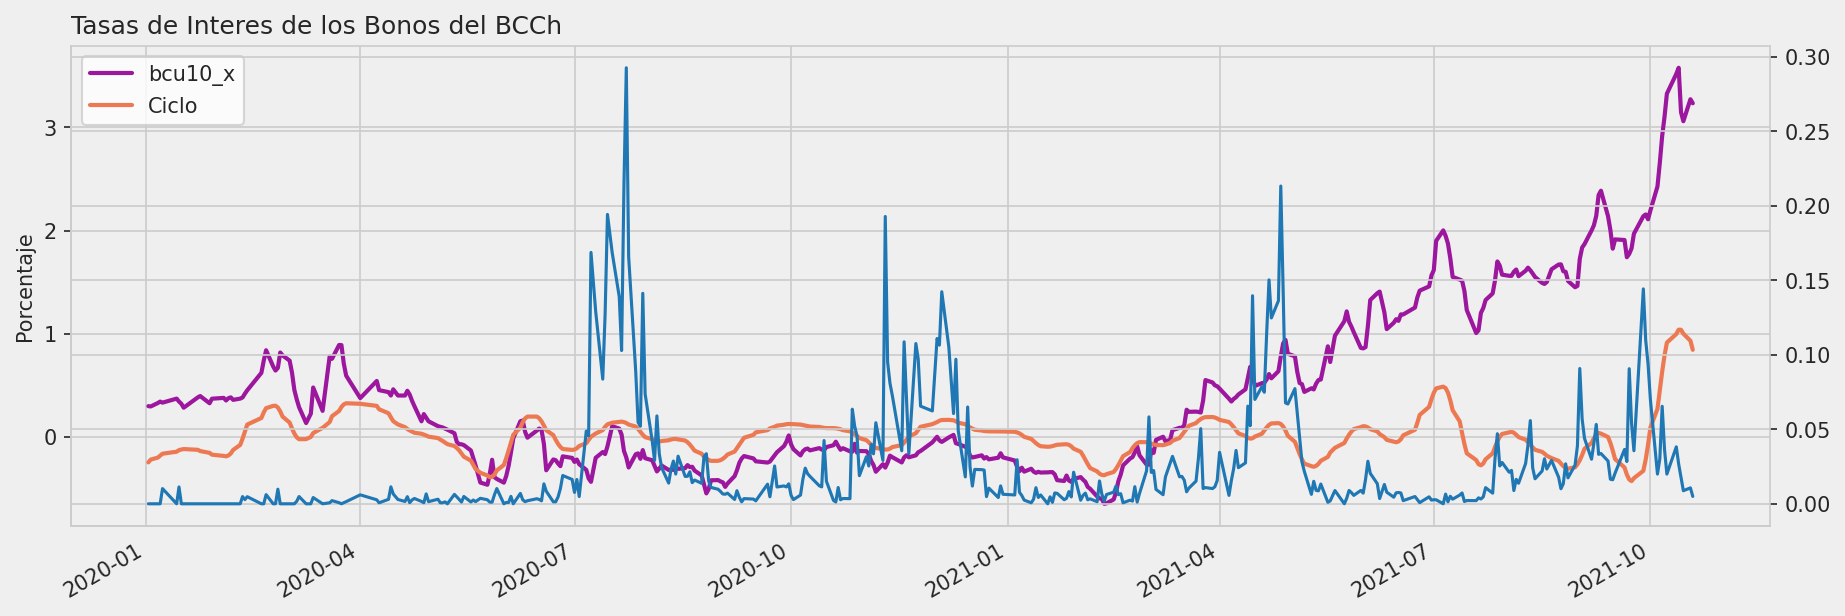

In [ ]:
df6=merged2.reset_index()
df6['Ciclo']=df6["bcu10_y"]
df6['retiro']=df6["retiro2_i"]
df6_filtered =df6[df6["Date"] >= "2020-01-01"]
df6_filtered=df6_filtered.set_index("Date")
fig, ax = plot_nameseries(df6_filtered[["bcu10_x", "Ciclo"]])
ax2 = ax.twinx()
ax2.plot(df6_filtered[["retiro"]])
ax.xaxis.set_tick_params(labelsize='medium')
plt.xticks(rotation=0)
ax.legend()
ax.set_title("Tasas de Interes de los Bonos del BCCh", loc="left")

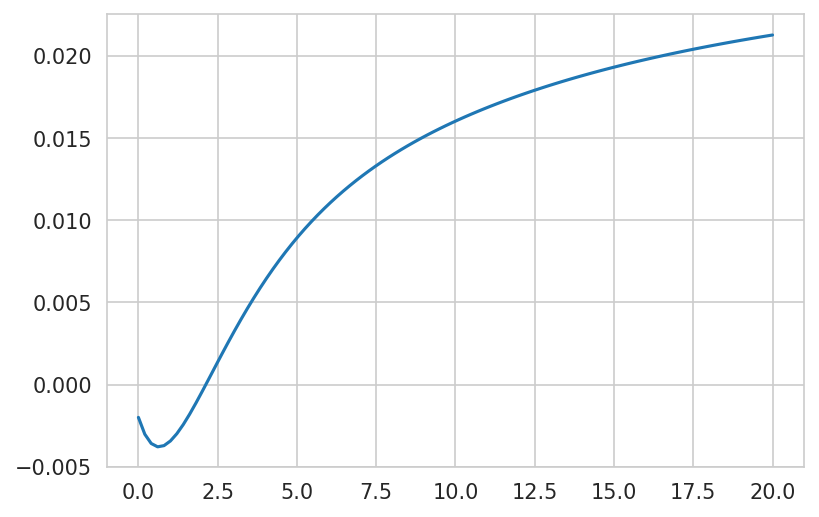

In [ ]:
y = NelsonSiegelSvenssonCurve(0.028, -0.03, -0.04, -0.015, 1.1, 4.0)
t = np.linspace(0, 20, 100)
plot(t, y(t))

In [ ]:
import numpy as np
from nelson_siegel_svensson.calibrate import calibrate_ns_ols

t = np.array([0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0])
y = np.array([0.01, 0.011, 0.013, 0.016, 0.019, 0.021, 0.026, 0.03, 0.035, 0.037, 0.038, 0.04])

curve, status = calibrate_ns_ols(t, y, tau0=1.0)  # starting value of 1.0 for the optimization of tau
assert status.success
print(curve)

NelsonSiegelCurve(beta0=0.04201739400669499, beta1=-0.031829031826270504, beta2=-0.026797318499329086, tau=1.7170973449011546)


In [ ]:
!nelson_siegel_svensson plot -o cli_plot_example.png -c '{"beta0": 0.042017393764903765, "beta1": -0.03182903146166806, "beta2": -0.026797320316066128, "tau": 1.717097232403383}'

In [ ]:
pip install kalman-estimation

In [ ]:
pip install Dynamic-Nelson-Siegel-Svensson-Kalman-Filter==0.1.0

In [ ]:
from Dynamic_Nelson_Siegel_Svensson_Kalman_Filter import kalman
import numpy as np
import pandas as pd

url = 'https://www.dropbox.com/s/inpnlugzkddp42q/bonds.csv?dl=1' # US Yield Curve 1972 - 2000
df = pd.read_csv(url,sep=';',index_col=0)

frct = False
ahead = 0
lik = True
mty =  np.array([3,6,9,12,15,18,21,24,30,36,48,60,72,84,96,108,120]) # maturities in months
model = 'NS'

param = np.array([-2.798522, # log of 0.0609
0.14170940,0.07289485,0.11492339,0.11120008,0.09055795,0.07672075,0.07222108,0.07076431,0.07012891,0.07267366,0.10624206,0.09029621,0.10374527,0.09801215,0.09122014,0.11794190,0.13354418, # H
0.99010443,0.02496842,-0.002294319, # phi
-0.02812401,0.94256154, 0.028699387, # phi
0.05178493,0.01247332, 0.788078795, # phi
8.345444,-1.572442,0.2029919,  # mu
0.3408764,-0.07882772,-0.21351036, # Q
0.62661018,-0.00425989, # Q
1.08802059]) # Q

kalman(param = param,Y = df, lik = lik, frct = frct, ahead = ahead, mty = mty, model = model)

-2850.8385381307025

In [ ]:
url0="https://si3.bcentral.cl/SieteRestWS/SieteRestWS.ashx?user="
user="154100601"
pw="qnpMKgsTXeSM4Sj"
i="1996-01-01"
f="2022-12-31"
bcu1 = "F022.BUF.TIS.AN01.UF.Z.D"
bcu2 = "F022.BUF.TIS.AN02.UF.Z.D"
bcu5 = "F022.BUF.TIS.AN05.UF.Z.D"
bcu10 = "F022.BUF.TIS.AN10.UF.Z.D"
bcu20 = "F022.BUF.TIS.AN20.UF.Z.D"
bcu30 = "F022.BUF.TIS.AN30.UF.Z.D"

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
system('sudo apt-get install -y r-cran-rjson', intern=TRUE)
#system('sudo apt-get install -y librsvg2-dev', intern=TRUE)

 [1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                

In [ ]:
%%R
install.packages('rjson')

In [ ]:
%%R
system('sudo apt-get install -y rjson-dev', intern=TRUE)    

In [ ]:
%%R
paste0("m","2")

[1] "m2"


In [ ]:
%%R
datalist = list()
url0="https://si3.bcentral.cl/SieteRestWS/SieteRestWS.ashx?user="
user="154100601"
pw="qnpMKgsTXeSM4Sj"
i="1996-01-01"
f="2022-12-31"
bcu1 = "F022.BUF.TIS.AN01.UF.Z.D"
bcu2 = "F022.BUF.TIS.AN02.UF.Z.D"
bcu5 = "F022.BUF.TIS.AN05.UF.Z.D"
bcu10 = "F022.BUF.TIS.AN10.UF.Z.D"
bcu20 = "F022.BUF.TIS.AN20.UF.Z.D"
bcu30 = "F022.BUF.TIS.AN30.UF.Z.D"
library("rjson")
#url="https://si3.bcentral.cl/SieteRestWS/SieteRestWS.ashx?user=154100601&pass=qnpMKgsTXeSM4Sj&firstdate=2015-01-01&lastdate=2021-01-31&timeseries=F022.TPM.TIN.D001.NO.Z.D&function=GetSeries"
url1=paste0(url0, user,"&pass=", pw,
             "&firstdate=",i,"&lastdate=",f,"&timeseries=",bcu1,"&function=GetSeries")
json_data <- rjson::fromJSON(file=url1)
df_data <- as.data.frame(do.call(rbind, lapply(json_data$Series$Obs, as.vector)))
head(df_data)

  indexDateString value statusCode
1      24-02-2006  2.56         OK
2      25-02-2006   NaN         ND
3      26-02-2006   NaN         ND
4      27-02-2006  2.56         OK
5      28-02-2006  2.56         OK
6      01-03-2006  2.56         OK


In [ ]:
%%R
gdppc.wide= reshape(data = gdppc,
idvar= "year",
v.names= c("gdppc"),
timevar= "country",
direction = "wide")